In [1]:
from PIL import Image, ImageDraw
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, filters, metrics, util

<Figure size 432x288 with 0 Axes>

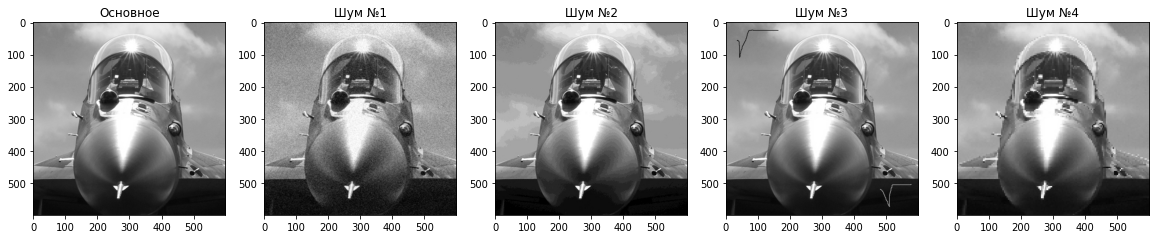

In [2]:
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(20, 20)
)

ax1.set_title('Основное')
ax2.set_title('Шум №1')
ax3.set_title('Шум №2')
ax4.set_title('Шум №3')
ax5.set_title('Шум №4')


image_0 = cv2.imread("./images/test2_0.jpg") #Открываем изображение. 

image_1 = cv2.imread("./images/test2_1.jpg") #Открываем изображение. 

image_2 = cv2.imread("./images/test2_2.jpg") #Открываем изображение. 

image_3 = cv2.imread("./images/test2_3.jpg") #Открываем изображение. 

image_4 = cv2.imread("./images/test2_4.jpg") #Открываем изображение. 


ax1.imshow(image_0, cmap='gray')
ax2.imshow(image_1,cmap='gray')
ax3.imshow(image_2,cmap='gray')
ax4.imshow(image_3,cmap='gray')
ax5.imshow(image_4,cmap='gray')


plt.show()

In [4]:
# PSNR до фильтрации
psnr_before_image_1 = cv2.PSNR(image_0, image_1)
psnr_before_image_2 = cv2.PSNR(image_0, image_2)
psnr_before_image_3 = cv2.PSNR(image_0, image_3)
psnr_before_image_4 = cv2.PSNR(image_0, image_4)

print("PSNR для 1-го изображения, до фильтрации =", round(psnr_before_image_1, 2))
print("PSNR для 2-го изображения, до фильтрации =", round(psnr_before_image_2, 2))
print("PSNR для 3-го изображения, до фильтрации =", round(psnr_before_image_3, 2))
print("PSNR для 4-го изображения, до фильтрации =", round(psnr_before_image_4, 2))

PSNR для 1-го изображения, до фильтрации = 27.98
PSNR для 2-го изображения, до фильтрации = 34.46
PSNR для 3-го изображения, до фильтрации = 31.66
PSNR для 4-го изображения, до фильтрации = 26.64


<Figure size 432x288 with 0 Axes>

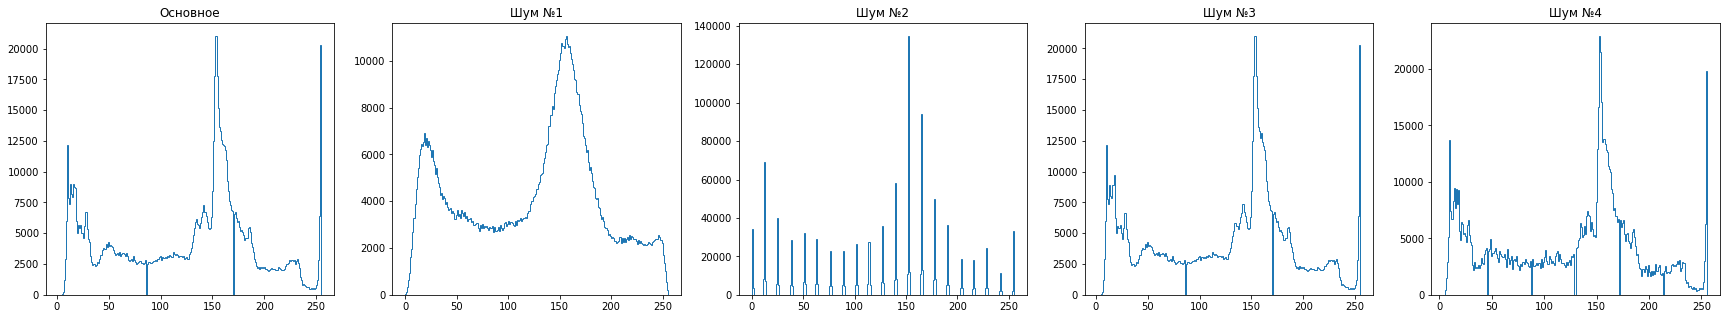

In [5]:
# Гистограммы изображений
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(30, 5)
)

ax1.set_title('Основное')
ax2.set_title('Шум №1')
ax3.set_title('Шум №2')
ax4.set_title('Шум №3')
ax5.set_title('Шум №4')


ax1.hist(image_0.ravel(),bins = 256, histtype = 'step' )
ax2.hist(image_1.ravel(),bins = 256, histtype = 'step' )
ax3.hist(image_2.ravel(),bins = 256, histtype = 'step' )
ax4.hist(image_3.ravel(),bins = 256, histtype = 'step' )
ax5.hist(image_4.ravel(),bins = 256, histtype = 'step' )


plt.show()

In [7]:
# Отображение пары изображений до и после фильтрации
def showImages(*args):
    fig, axes = plt.subplots(1, len(args))

    for i in range(len(axes)):
        axes[i].imshow(args[i], cmap="gray")

    fig.set_figwidth(10)    
    fig.set_figheight(10)  
    plt.show()

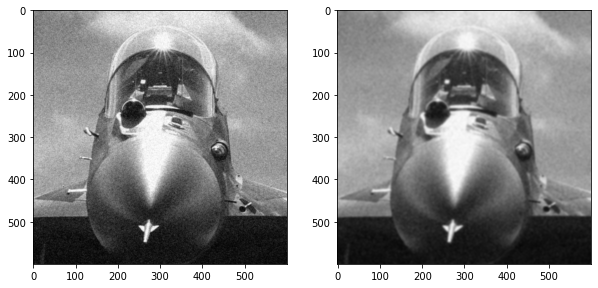

In [8]:
new_image_1 = cv2.GaussianBlur(image_1, (9, 9), 2)
showImages(image_1, new_image_1)

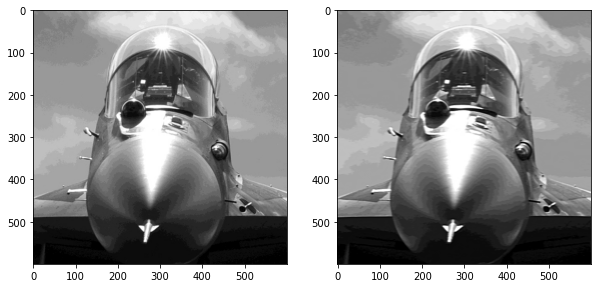

In [14]:
new_image_2 = filters.gaussian(image_2, 2, channel_axis=False)
new_image_2 = filters.unsharp_mask(filters.median(new_image_2), 2)
showImages(image_2, new_image_2)

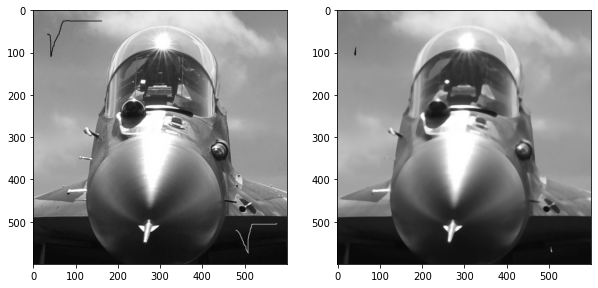

In [16]:
new_image_3 = cv2.medianBlur(image_3, 7)
showImages(image_3, new_image_3)

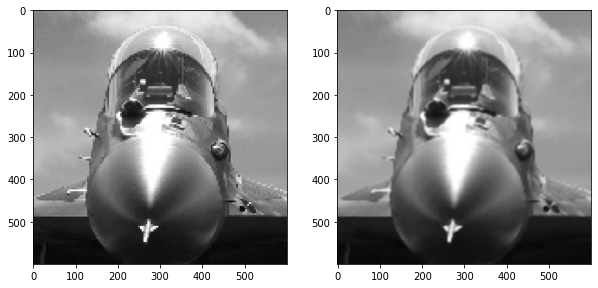

In [17]:
new_image_buf = cv2.blur(image_4, (5, 5))
new_image_4 = cv2.medianBlur(new_image_buf, 5)
showImages(image_4, new_image_4)

In [20]:
psnr_after_image_1 = cv2.PSNR(image_0, new_image_1)
psnr_after_image_2 = cv2.PSNR(image_0, new_image_2)
psnr_after_image_3 = cv2.PSNR(image_0, new_image_3)
psnr_after_image_4 = cv2.PSNR(image_0, new_image_4)
print("PSNR для 1-го изображения, после фильтрации =", round(psnr_after_image_1, 2))
print("PSNR для 2-го изображения, после фильтрации =", round(psnr_after_image_2, 2))
print("PSNR для 3-го изображения, после фильтрации =", round(psnr_after_image_3, 2))
print("PSNR для 4-го изображения, после фильтрации =", round(psnr_after_image_4, 2))

PSNR для 1-го изображения, после фильтрации = 29.1
PSNR для 2-го изображения, после фильтрации = 5.9
PSNR для 3-го изображения, после фильтрации = 30.95
PSNR для 4-го изображения, после фильтрации = 28.38
